In [20]:
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt

## Initialization

In [21]:
x=39 #initial density rate
xN = 1 #noise covarinace in system
xR = 1 #noise covarinace in measurement
T = 240 #num iterations
N = 125 #number of particles to generate

In [22]:
V=2 # variance of initial estimate
xP =[] # vector of particles

## Generating particles using normal distribution

In [23]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, N)

In [24]:
for i in np.arange(0,N+1):
    xP.append(x+math.sqrt(V)*s)

In [25]:
# sns.lineplot(data=xP, dashes=False)
# plt.xlabel("Flight Position")
# plt.ylabel("Time Step");

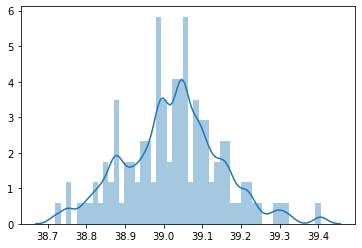

In [26]:
sns.distplot(np.array(xP))

## Observations from randomly selected particles

In [27]:
z_out = x+math.sqrt(xR) * s

In [28]:
x_out, x_est = [x],[x]

In [29]:
z_est_out = [x_est]

## PF

In [30]:
xP_update=[]
z_update =[]
pw=[]

In [32]:
#update the new position and observed position
for t in np.arange(0, T+1):
    x = x+25*x/(1+x**2)+8*math.cos(1.2*(t-1))+math.sqrt(xN)*s
    z = x+math.sqrt(xR)*s

In [58]:
print(x)

[127.80465764 124.12785694 108.98250935  80.40956676 125.61686645
 142.7718734   91.2048725   88.96432519 136.36560601 104.42196431
 106.87639901 121.50496189 103.28349479  98.19700196 111.37492845
 113.63900617 130.9544384  151.78363767 104.08280215 118.07367941
  90.84544533 132.02970843 118.41106179 120.2289081  137.08524533
 125.45179104 119.07155881  83.66069345 107.21170345 108.79365784
 124.42111795 120.17972135 140.95990332 119.72552693 127.2392226
 118.83227563 114.9914836  112.70232927 109.69338862 112.42826239
 117.24004277 133.79535749 128.42165656 147.05047012 133.59269059
 154.03722856 111.23823911 112.15256246  94.79042018  92.66178396
 100.32985521 117.02461374 113.76219316 117.00084725  94.40856349
 131.84665065 112.14801377 117.51859842 122.60564075 108.13456836
 128.64937187 142.90111603  99.17168124 103.70234797 143.89712258
  87.70218167  98.54257232 140.57619869 114.471368   112.65766338
 101.43263931 129.51074627 136.1875169  122.68901384 133.7273842
 114.0857739

In [59]:
print(z)

[127.88173865 124.18527827 108.95665314  80.21157024 125.68227269
 142.92719785  91.07495513  88.82064341 136.48776486 104.37017
 106.83862079 121.54823741 103.22515239  98.10901302 111.36250379
 113.63918929 131.04821303 151.98490579 104.02906027 118.09828614
  90.71333142 132.12915223 118.43751268 120.26526312 137.2111526
 125.51631364 119.10161453  83.48369424 107.17582962 108.76673642
 124.48011447 120.2158091  141.10589242 119.75914479 127.31329266
 118.86102624 114.99915243 112.69730822 109.6715355  112.4217155
 117.26008455 133.90407881 128.50201807 147.22770493 133.70034896
 154.24986863 111.22505013 112.14447919  94.68218708  92.54072661
 100.2543781  117.04347391 113.76305948 117.01957702  94.29804007
 131.94513035 112.13990514 117.54016687 122.6548652  108.10392354
 128.73094281 143.05710503  99.08942497 103.64641822 144.05822717
  87.55066828  98.45661881 140.72020645 114.47616204 112.65239376
 101.36358505 129.5968858  136.30874721 122.73868814 133.83574907
 114.08843355  

In [56]:
# apply pf
for i in np.arange(0, N+1):
    xP_update = xP[i]+(25*xP[i]/(1+xP[i]**2)) + (8*math.cos(1.2*(t-1))) + (math.sqrt(xN)*s)
    z_update = xP_update[i]+math.sqrt(xR)*s
    pw = (1/math.sqrt(2*math.pi*xR))*math.exp(-(z-list(z_update)[i])**2/(2*xR))

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
np.arange(0,N+1)

In [43]:
len(xP_update)

125

In [44]:
len(z_update)

125

In [45]:
np.arange(0, N+1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125])